In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import mannwhitneyu ## for those wonderful p-values!

## Nature journal settings
plt.rcParams["font.family"] = "Arial"
colors = ["#E64B35FF", "#3C5488FF", "#00A087FF", "#4DBBD5FF", "#F39B7FFF", "#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF"]
sns.set_palette(sns.color_palette(colors))

In [2]:
m_fn = 'run_2d/analysis/m.csv'
m = pd.read_csv(m_fn)
mp_fn = 'run_2d/analysis/mp.csv'
mp = pd.read_csv(mp_fn)

In [3]:
dataset_pairs = ['REP_GDSC', 'REP_CTD2', 'CTD2_GDSC', 'CTD2_REP', 'GDSC_CTD2', 'GDSC_REP']

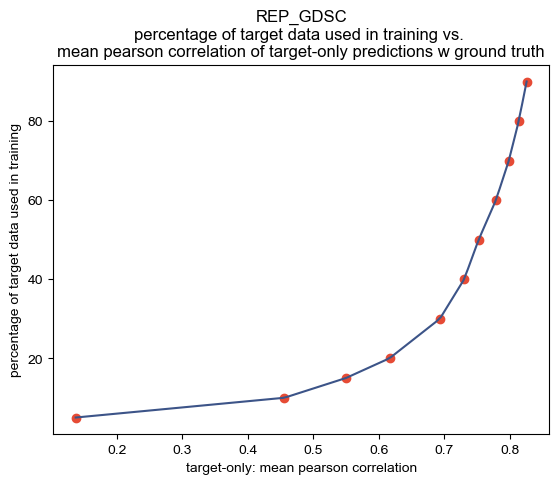

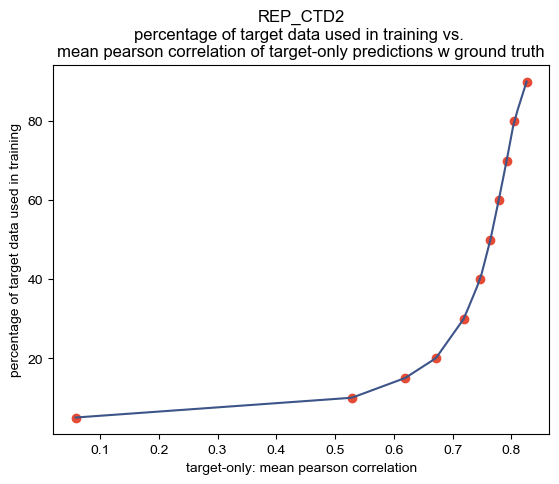

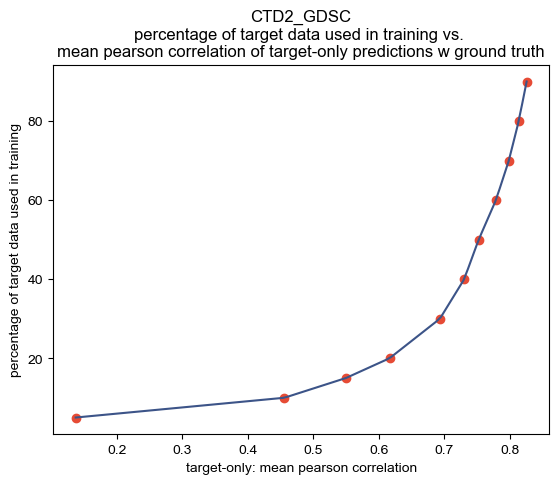

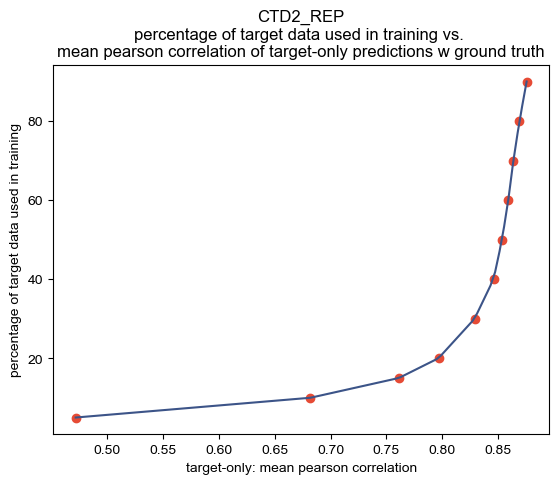

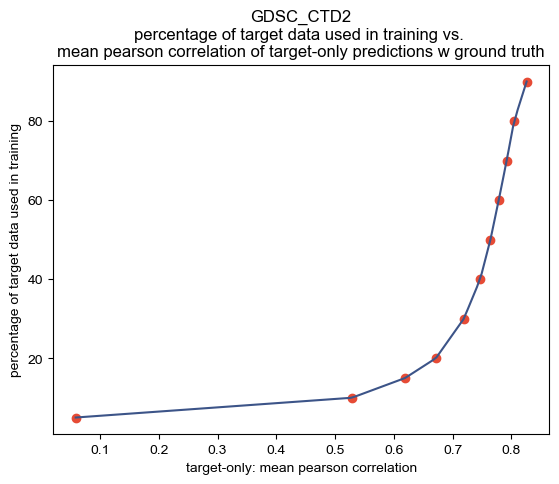

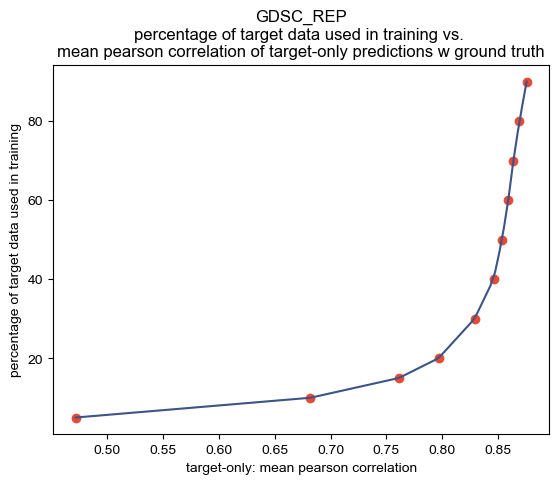

In [4]:
# plotting interpolation curve
for pair in dataset_pairs:
    smp = mp.loc[mp.pair == pair]
    x = smp['target_only_mean'].to_numpy()
    y = smp['percent-used'].to_numpy()
    x1 = np.linspace(np.min(x), np.max(x), 101)
    y1 = np.interp(x=x1, xp=x, fp=y)
    plt.clf()
    plt.xlabel('target-only: mean pearson correlation')
    plt.ylabel('percentage of target data used in training')
    plt.title(pair + '\npercentage of target data used in training vs. \nmean pearson correlation of target-only predictions w ground truth')
    plt.plot(x, y, 'o')
    plt.plot(x1, y1, '-')
    source, target = pair.split('_')
    fig_fn = 'plots/interp-' + source + '-' + target + '.png'
    plt.savefig(fig_fn, bbox_inches='tight')
    plt.show()

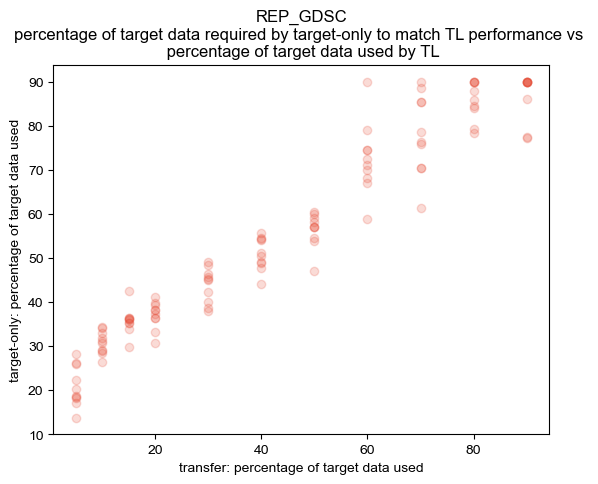

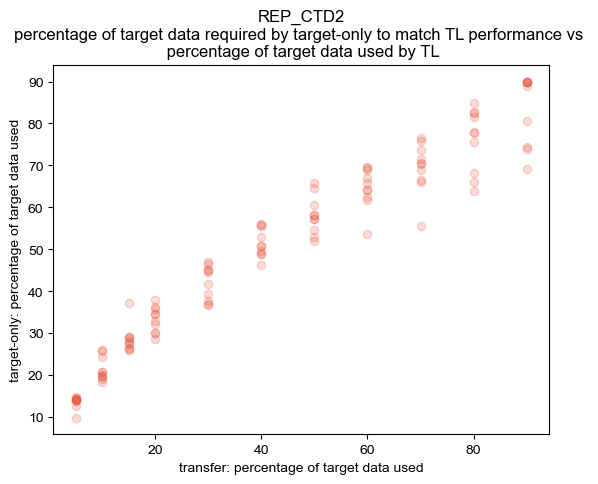

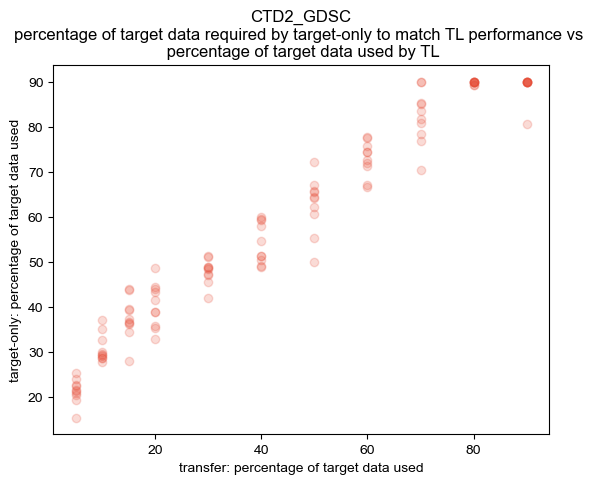

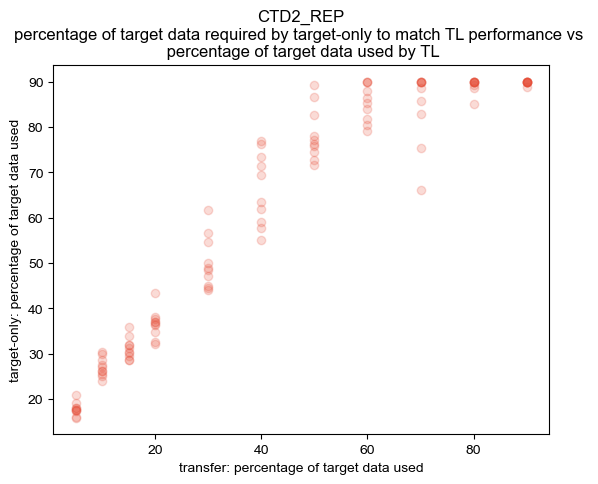

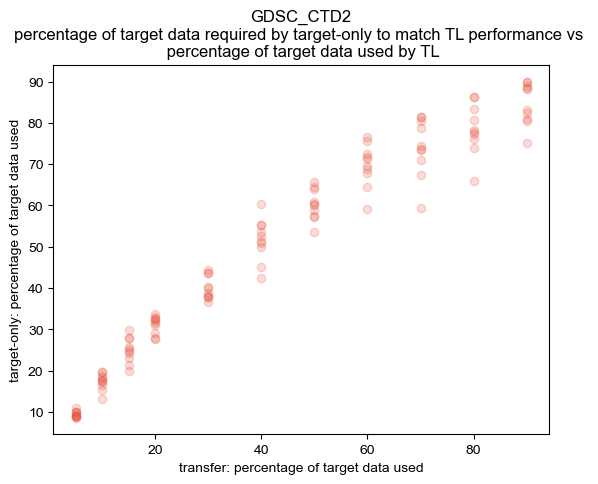

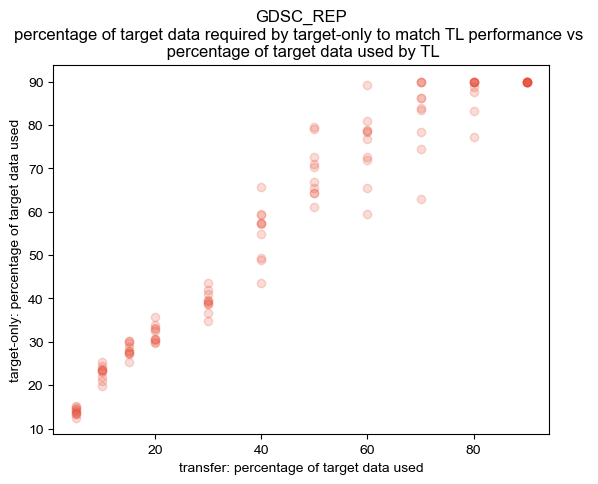

In [9]:
# plotting %-data to match
for pair in dataset_pairs:
    sm = m.loc[m.pair == pair]
    plt.clf()
    plt.scatter(x=sm['percent-used'], y=sm['percent-to-match-TL'], alpha=.2)
    plt.xlabel('transfer: percentage of target data used')
    plt.ylabel('target-only: percentage of target data used')
    plt.title(pair + '\npercentage of target data required by target-only to match TL performance vs \n percentage of target data used by TL')
    source, target = pair.split('_')
    fig_fn = 'plots/match-' + source + '-' + target + '.png'
    plt.savefig(fig_fn, bbox_inches='tight')
    plt.show()

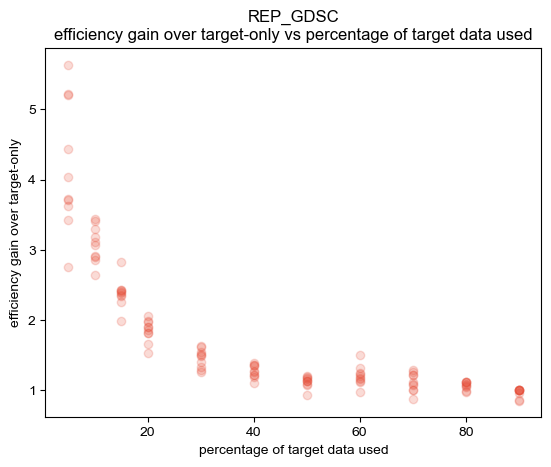

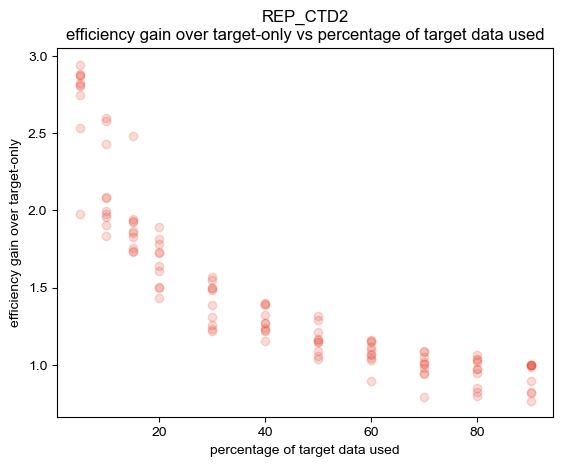

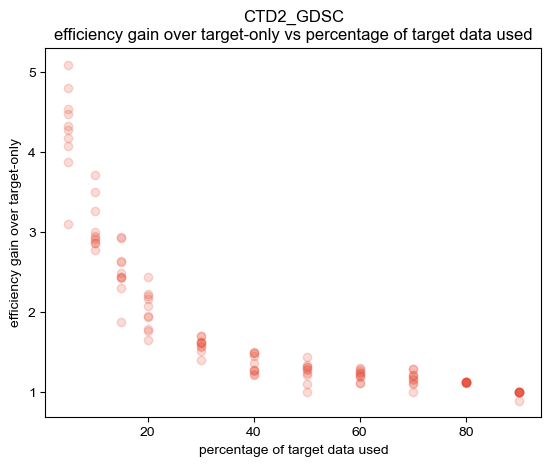

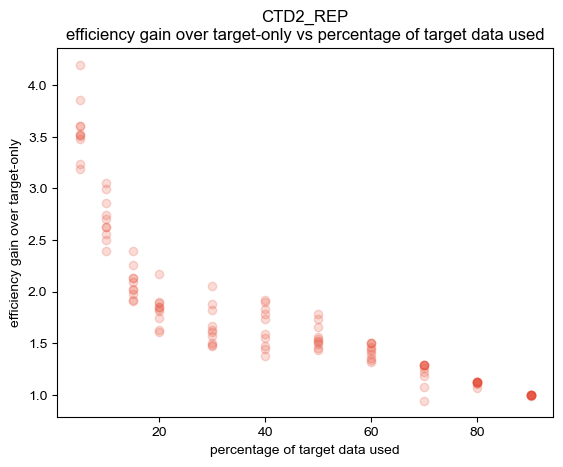

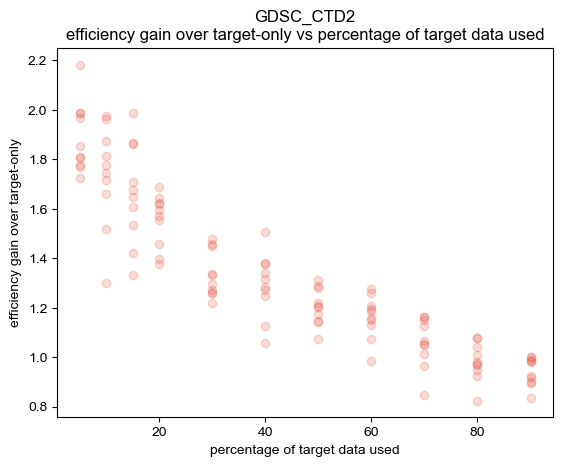

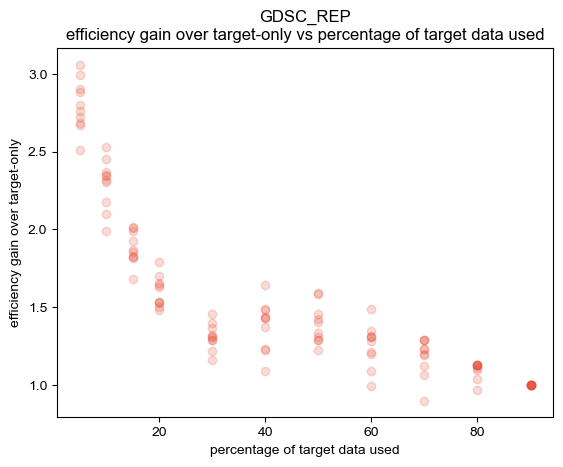

In [11]:
# plotting efficiency gains
for pair in dataset_pairs:
    sm = m.loc[m.pair == pair]
    plt.clf()
    plt.scatter(x=sm['percent-used'], y=sm['efficiency-gain'], alpha=.2)
    plt.xlabel('percentage of target data used')
    plt.ylabel('efficiency gain over target-only')
    plt.title(pair + '\nefficiency gain over target-only vs percentage of target data used')
    source, target = pair.split('_')
    fig_fn = 'plots/gains-' + source + '-' + target + '.png'
    plt.savefig(fig_fn, bbox_inches='tight')
    plt.show()